# 1st Project : Neural Network for Handwritten Digits Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [7]:
# Load HandWritten datasets from kers library

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

4


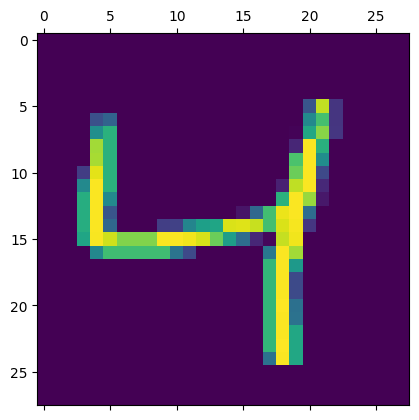

In [17]:
# Visualize digit 
plt.matshow(X_train[2])
print(y_train[2])

Firstly we need to flatten our dataset for the first neuron layer

In [30]:
#Scaling the values. Scaling increased accuracy from 0.8848 to 9281
X_train = X_train/255
X_test = X_test/255

X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
print(X_train_flatten.shape )
print(X_test_flatten.shape )
# Shape (60000, 784) : means that we have 60000 samples with 784 elements each one (pixels)


(60000, 784)
(10000, 784)


We are going to work firstly without a hidden layer, so we have only 2 layers 

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid' )
] ) # Sequential means the layers are stack. And with the Dense attribute we say that each neurnon from the first layers is connected with everyone from the second layer

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train_flatten, y_train, epochs = 5 ) # Train the model 

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8128 - loss: 0.7139
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9126 - loss: 0.3148
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9200 - loss: 0.2876
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9221 - loss: 0.2799
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9281 - loss: 0.2585


In [32]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9141 - loss: 0.3041


[0.2696141302585602, 0.9253000020980835]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7

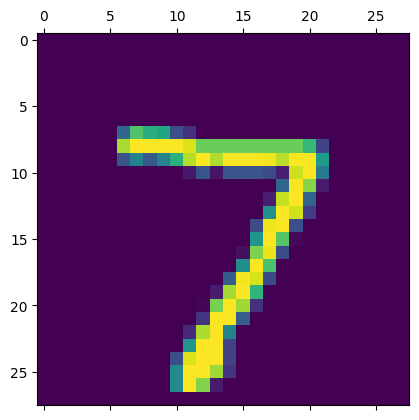

In [39]:
plt.matshow(X_test[0])
y_predicted = model.predict(X_test_flatten)
np.argmax(y_predicted[0]) # Printing index of maximum value

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

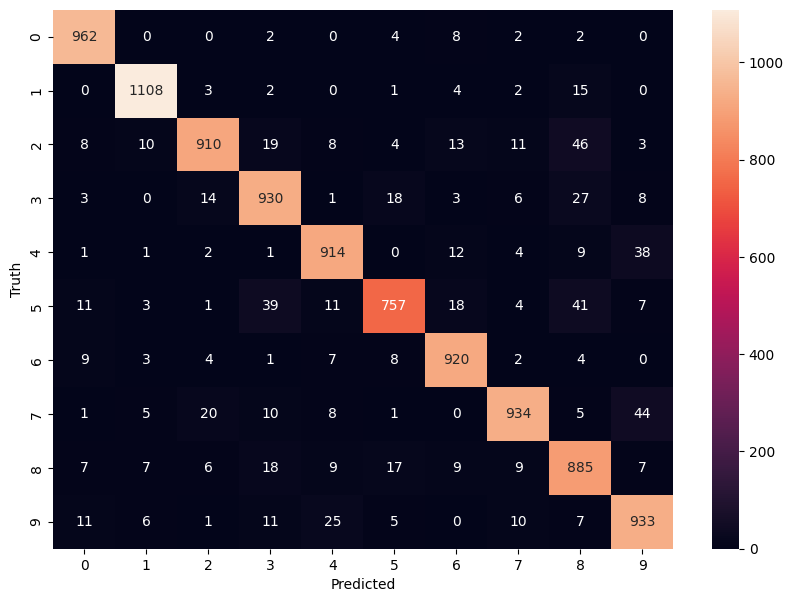

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')# The following plot gives us a representation on the times the model had real = prediction (diagonal) and the times it was wrong. 

Proceeding with adding more layers to the model 

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu' ),
    keras.layers.Dense(10, activation = 'sigmoid' )
] ) # Sequential means the layers are stack. And with the Dense attribute we say that each neurnon from the first layers is connected with everyone from the second layer

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train_flatten, y_train, epochs = 5 ) # Train the model 

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8749 - loss: 0.4529
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9637 - loss: 0.1276
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0846
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9815 - loss: 0.0603
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0506


In [48]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0893


[0.07396668195724487, 0.9761999845504761]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

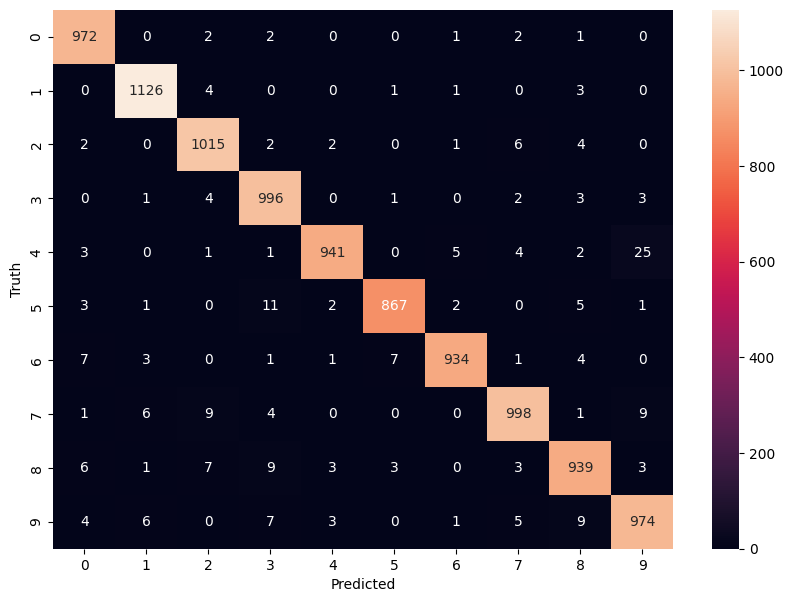

In [53]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In order to avoide flattening every time our data, we can add one more layer to the model with the same dimensions as our inputs. IN our case this means adding a layer with shape (28,28) (matrix dimensions for each digit)

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100 ,activation = 'relu' ),
    keras.layers.Dense(10, activation = 'relu' )
] ) # Sequential means the layers are stack. And with the Dense attribute we say that each neurnon from the first layers is connected with everyone from the second layer

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs = 5 ) # Train the model
model.evaluate(X_test, y_test)

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1741 - loss: 2.3994
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1386 - loss: 2.2210
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1350 - loss: 2.2189
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.1405 - loss: 2.2109
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0990 - loss: 2.3029
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0924 - loss: 2.3026


[2.30259108543396, 0.09799999743700027]

# Loss function

- It is a metric for NN training 
- Los is called each individual error and the total of that (let's say MSE) is the cost function
- epochs : epoch = 1 means go through all the training samples once. 
- Log loss or binary cross entropy ('binary_crossentropy') : Mostly used for logistic regression. It is a classification cost function. 